<a href="https://colab.research.google.com/github/heisdenverr/MNIST/blob/master-branch/custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %%writefile going_modular/data_setup.py

# """
# Contains functionality for creating Pytorch DataLoader's for Image classification data

# """

# import os
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader

# NUM_WORKERS = os.cpu_count()
# BATCH_SIZE = 32

# def create_dataloaders(
#     train_dir: str,
#     test_dir: str,
#     transform: transforms.Compose,
#     batch_size: int,
#     num_workers: int=NUM_WORKERS):

#   """ Creates training and testing DataLoaders.

#   Takes in a training directory and testing directory path and turns them into
#   Pytorch Datasets and then into PyTorch DataLoaders.

#   Args:
#   train_dir: str, path to the training directory.
#   test_dir: str, path to the testing directory.
#   transform: transforms.Compose, a composition of image transformations to apply.
#   batch_size: int, batch per dataloader [32, 64, 128]
#   num_workers: int, number of workers for the DataLoader.

#   Returns:
#   A tuple of (train_dataloader, test_dataloader, class_names).
#   Where class_names is a list of the target classes.
#   Example usage:
#       train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=path,
#       test_dir=path,
#       transforms=some_transform,
#       batch_size=32,
#       num_workers=4)

#   """
#   train_directory , test_directory = train_dir, test_dir

#   data_transform = transforms.Compose([
#       transforms.Resize(size=(64, 64)),
#       transforms.ToTensor()
#       ])

#   train_data = datasets.ImageFolder(
#       root=train_directory,
#       trasform=data_transform,
#       target_transform=None
#   )
#   test_data = datasets.ImageFolder(
#       root=test_directory,
#       transform=data_transform
#   )

#   train_dataloader = DataLoader(
#       dataset=train_data,
#       batch_size=BATCH_SIZE,
#       num_workers=NUM_WORKERS,
#       shuffle=True
#   )
#   test_dataloader = DataLoader(
#       dataset=test_data,
#       batch_size=BATCH_SIZE,
#       num_workers=NUM_WORKERS,
#       shuffle=False
#   )

#   class_names = train_data.classes
#   class_idx = train_data.class_to_idx
#   return train_dataloader, test_dataloader, class_names

In [2]:
!nvidia-smi

Tue Aug 20 20:02:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os

try:
  if not os.mkdir("going_modular").exists():
    os.mkdir("going_modular")

except:
  print("going_modular already exist")

going_modular already exist


In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "3foods"

if image_path.exists():
  print("Data already exists")
else:
  print("Loading data")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "3foods.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading.....")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "3foods.zip", "r") as zipr:
    print("Unzipping,,,,,")
    zipr.extractall(image_path)

Loading data
Downloading.....
Unzipping,,,,,


## 2.Becoming one with the data

In [5]:
from posixpath import dirname
import os

def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/3foods'.
There are 3 directories and 0 images in 'data/3foods/test'.
There are 0 directories and 25 images in 'data/3foods/test/pizza'.
There are 0 directories and 31 images in 'data/3foods/test/sushi'.
There are 0 directories and 19 images in 'data/3foods/test/steak'.
There are 3 directories and 0 images in 'data/3foods/train'.
There are 0 directories and 78 images in 'data/3foods/train/pizza'.
There are 0 directories and 72 images in 'data/3foods/train/sushi'.
There are 0 directories and 75 images in 'data/3foods/train/steak'.


In [7]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/3foods/train'), PosixPath('data/3foods/test'))

In [8]:
#!pip install pillow

data/3foods/train/pizza/1968947.jpg
pizza
Image class: pizza
Image height: 512
Image width: 512


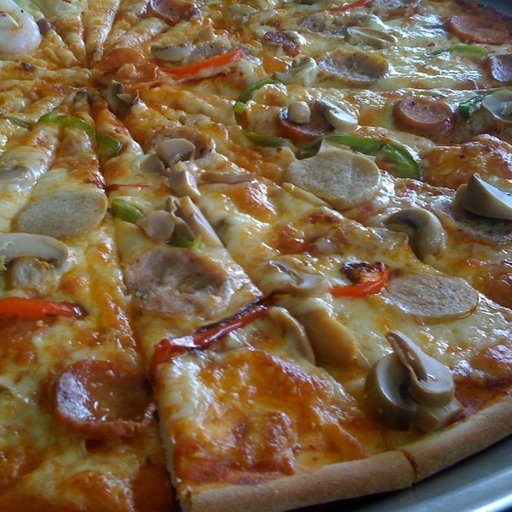

In [9]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [10]:
print(image_path_list)

[PosixPath('data/3foods/test/pizza/398345.jpg'), PosixPath('data/3foods/test/pizza/416067.jpg'), PosixPath('data/3foods/test/pizza/2871261.jpg'), PosixPath('data/3foods/test/pizza/540882.jpg'), PosixPath('data/3foods/test/pizza/2111981.jpg'), PosixPath('data/3foods/test/pizza/2003290.jpg'), PosixPath('data/3foods/test/pizza/309892.jpg'), PosixPath('data/3foods/test/pizza/1503858.jpg'), PosixPath('data/3foods/test/pizza/2218680.jpg'), PosixPath('data/3foods/test/pizza/2508636.jpg'), PosixPath('data/3foods/test/pizza/1687143.jpg'), PosixPath('data/3foods/test/pizza/1152100.jpg'), PosixPath('data/3foods/test/pizza/971934.jpg'), PosixPath('data/3foods/test/pizza/714866.jpg'), PosixPath('data/3foods/test/pizza/344397.jpg'), PosixPath('data/3foods/test/pizza/2019408.jpg'), PosixPath('data/3foods/test/pizza/195160.jpg'), PosixPath('data/3foods/test/pizza/1925494.jpg'), PosixPath('data/3foods/test/pizza/194643.jpg'), PosixPath('data/3foods/test/pizza/930553.jpg'), PosixPath('data/3foods/test/p

In [11]:
import matplotlib.pyplot as plt
import numpy as np

n_img = np.asarray(img)
print(repr(img))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7BAD80144B50>


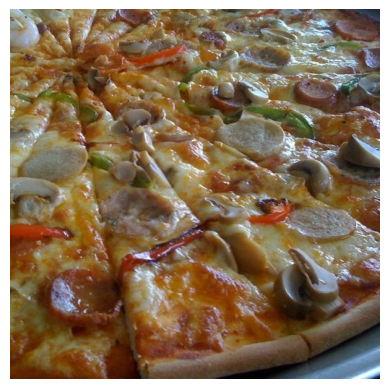

In [12]:
imgplot = plt.imshow(n_img)
plt.axis(False);

array([[[172, 181, 176],
        [172, 183, 177],
        [173, 186, 179],
        ...,
        [ 33,  39,  61],
        [ 30,  38,  61],
        [ 28,  39,  61]],

       [[169, 178, 173],
        [170, 181, 175],
        [172, 185, 178],
        ...,
        [ 34,  40,  62],
        [ 30,  41,  63],
        [ 30,  41,  63]],

       [[170, 176, 172],
        [171, 180, 175],
        [173, 184, 180],
        ...,
        [ 32,  40,  59],
        [ 29,  40,  60],
        [ 29,  42,  61]],

       ...,

       [[ 92,  31,   2],
        [ 93,  32,   3],
        [ 94,  33,   2],
        ...,
        [ 18,  34,  67],
        [ 16,  29,  61],
        [ 15,  29,  58]],

       [[ 92,  31,   2],
        [ 93,  32,   3],
        [ 94,  33,   4],
        ...,
        [ 15,  25,  52],
        [ 13,  23,  48],
        [ 14,  24,  49]],

       [[ 93,  32,   3],
        [ 93,  32,   3],
        [ 93,  32,   3],
        ...,
        [ 18,  24,  48],
        [ 13,  21,  42],
        [ 13,  21,  42]]], dtype=uint8)
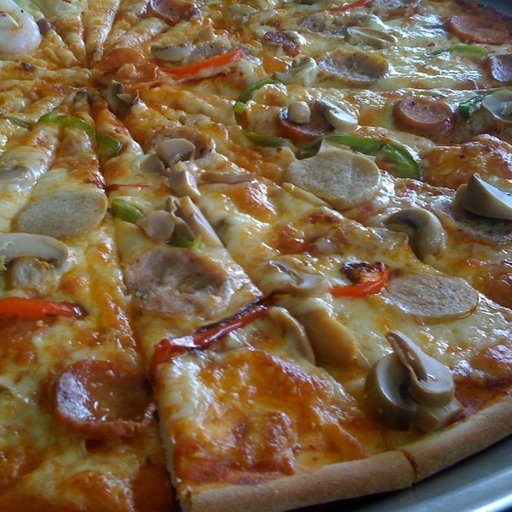

In [13]:
n_img

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [15]:
data_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ]
)

In [16]:
data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [17]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [18]:
data_transform(img).dtype

torch.float32

In [19]:
data_transform(img)

tensor([[[0.6510, 0.6431, 0.5725,  ..., 0.1843, 0.1529, 0.1373],
         [0.5765, 0.6235, 0.6118,  ..., 0.2471, 0.2235, 0.1922],
         [0.5490, 0.6196, 0.6392,  ..., 0.2980, 0.2824, 0.2353],
         ...,
         [0.3686, 0.3804, 0.3922,  ..., 0.3843, 0.4039, 0.4627],
         [0.3922, 0.3765, 0.3686,  ..., 0.5294, 0.6863, 0.7255],
         [0.3765, 0.3686, 0.3529,  ..., 0.8000, 0.6196, 0.3608]],

        [[0.7020, 0.7333, 0.6549,  ..., 0.2196, 0.2078, 0.1843],
         [0.5608, 0.6392, 0.6627,  ..., 0.1961, 0.2196, 0.2235],
         [0.5843, 0.6392, 0.6392,  ..., 0.2000, 0.1882, 0.1725],
         ...,
         [0.1647, 0.1882, 0.2235,  ..., 0.5176, 0.5373, 0.6118],
         [0.1843, 0.1686, 0.1647,  ..., 0.6627, 0.8157, 0.8824],
         [0.1451, 0.1373, 0.1333,  ..., 0.9059, 0.7569, 0.4902]],

        [[0.6824, 0.7529, 0.6039,  ..., 0.2902, 0.2745, 0.2510],
         [0.4941, 0.5569, 0.6353,  ..., 0.2314, 0.2784, 0.2902],
         [0.5725, 0.5686, 0.5686,  ..., 0.1922, 0.1961, 0.

Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)


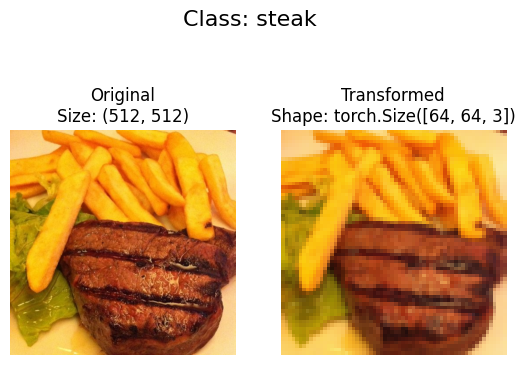

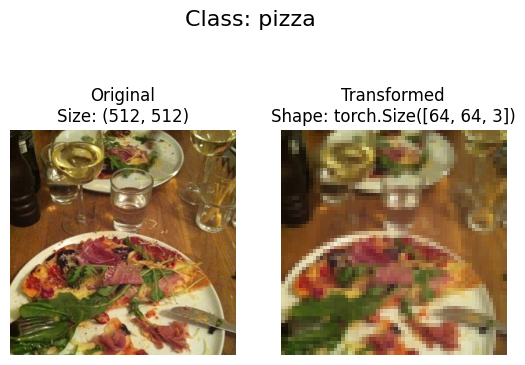

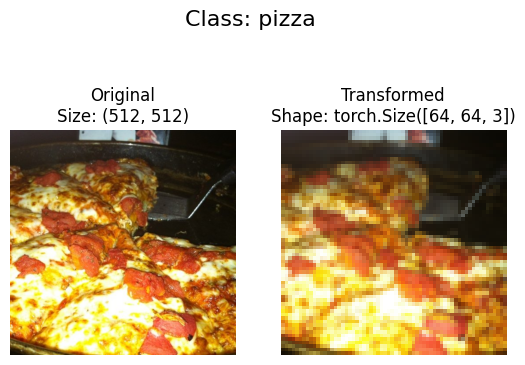

In [20]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      print(ax[0])
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis('off')

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform, seed=42)

In [21]:
train_data = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=data_transform,
)


train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/3foods/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/3foods/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [22]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [23]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
len(train_data), len(test_data)

(225, 75)

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [26]:
img, label = train_data[0][0], train_data[0][1]
img.shape, img.dtype, label, type(label)

(torch.Size([3, 64, 64]), torch.float32, 0, int)

Text(0.5, 1.0, 'pizza')

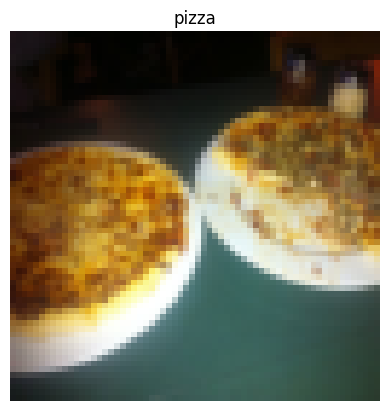

In [27]:
img_permute = img.permute(1, 2, 0)
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label])

In [28]:


BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=True)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    num_workers=1,
    shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7baca4208b80>,
 <torch.utils.data.dataloader.DataLoader at 0x7baca42087f0>)

In [29]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [30]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [31]:
import os
os.cpu_count()

2

In [32]:
class_names[train_data[0][1]]

'pizza'

In [33]:
train_data[0][1]

0

In [34]:
%%writefile going_modular/data_setup.py
"""
Contains functionality for creating PyTorch DataLoaders for
image classification data.
"""
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):
  """Creates training and testing DataLoaders.

  Takes in a training directory and testing directory path and turns
  them into PyTorch Datasets and then into PyTorch DataLoaders.

  Args:
    train_dir: Path to training directory.
    test_dir: Path to testing directory.
    transform: torchvision transforms to perform on training and testing data.
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.

  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage:
      train_dataloader, test_dataloader, class_names = \
        = create_dataloaders(train_dir=path/to/train_dir,
                             test_dir=path/to/test_dir,
                             transform=some_transform,
                             batch_size=32,
                             num_workers=4)
  """
  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False, # don't need to shuffle test data
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

Writing going_modular/data_setup.py


In [35]:
from going_modular import data_setup

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=data_transform,
                                                                               batch_size=32)
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7baca43efe80>,
 ['pizza', 'steak', 'sushi'])

In [36]:
import pathlib
import os
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [37]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

**Create a helper functions to replicate imagefolder .classes, .class_to_idx**

In [38]:
target_directory = train_dir
print(f"target_directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

class_names_found

target_directory: data/3foods/train


['pizza', 'steak', 'sushi']

In [39]:
for i in os.scandir(target_directory):
  print(i.name)

pizza
sushi
steak


In [40]:
def find_classes(directory: str)-> Tuple[list[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Directory {directory} does not contain any directories")


  classes_to_idx = {c : i for i, c in enumerate(classes)}


  return classes, classes_to_idx

In [41]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [42]:
find_classes(test_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [43]:


from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, targ_dir: str, transform=None):

    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [44]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [45]:
train_data_custom = ImageFolderCustom(
    targ_dir=train_dir,
    transform=train_transforms
)

test_data_custom = ImageFolderCustom(
    targ_dir=test_dir,
    transform=test_transforms
)

In [46]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [47]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [48]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [49]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [50]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print("n must be less than 10")
  if seed:
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16, 8))

  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1, 2, 0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title += f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

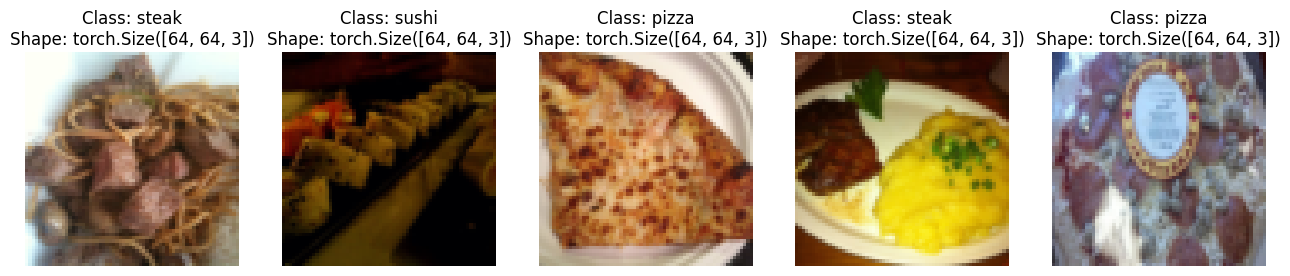

In [51]:
display_random_images(train_data, n=5, classes=class_names, seed=12937)

In [52]:
from torch.utils.data import  DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader_custom = DataLoader(
    dataset=test_data_custom,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7baca42c3f10>,
 <torch.utils.data.dataloader.DataLoader at 0x7baca42c1450>)

In [53]:
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [54]:
print(type(label_custom))

<class 'torch.Tensor'>


In [55]:
label_custom

tensor([2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
        1, 1, 1, 0, 2, 2, 1, 1])

In [56]:
img_custom.shape

torch.Size([32, 3, 64, 64])

In [57]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [58]:
image_path

PosixPath('data/3foods')

In [59]:
train_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ToTensor()
)

In [60]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/3foods/test/pizza/398345.jpg'),
 PosixPath('data/3foods/test/pizza/416067.jpg'),
 PosixPath('data/3foods/test/pizza/2871261.jpg'),
 PosixPath('data/3foods/test/pizza/540882.jpg'),
 PosixPath('data/3foods/test/pizza/2111981.jpg'),
 PosixPath('data/3foods/test/pizza/2003290.jpg'),
 PosixPath('data/3foods/test/pizza/309892.jpg'),
 PosixPath('data/3foods/test/pizza/1503858.jpg'),
 PosixPath('data/3foods/test/pizza/2218680.jpg'),
 PosixPath('data/3foods/test/pizza/2508636.jpg')]

Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)


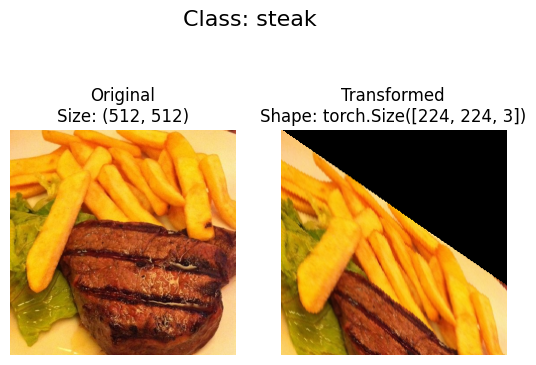

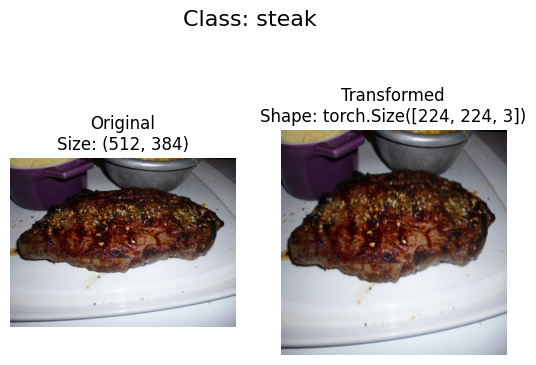

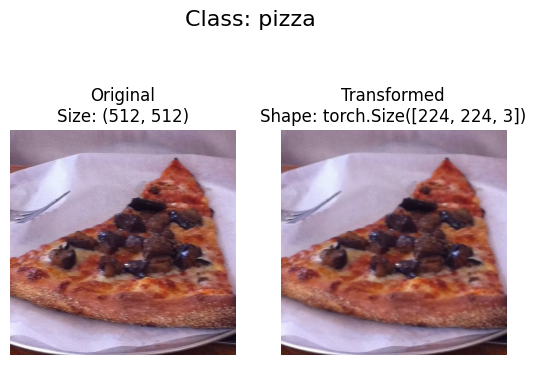

In [61]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

In [62]:
train_transforms

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [63]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [64]:
simple_train_data = ImageFolderCustom(
    targ_dir=train_dir,
    transform=simple_transform
)

simple_test_data = ImageFolderCustom(
    targ_dir=test_dir,
    transform=simple_transform
)

In [65]:
simple_train_loader = DataLoader(
    dataset=simple_train_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

simple_test_loader = DataLoader(
    dataset=simple_test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

In [66]:
simple_image, simple_label = next(iter(simple_train_loader))
simple_image.shape, simple_label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [67]:
train_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)

test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform
)

train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

In [68]:
from torch import nn

class TinyVGG(nn.Module):

  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*13*13,
                  out_features=len(class_names))
    )

  def forward(self, x: torch.Tensor):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [69]:
%%writefile going_modular/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model.
"""
import torch
from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture.

  Replicates the TinyVGG architecture from the CNN explainer website in PyTorch.
  See the original architecture here: https://poloclub.github.io/cnn-explainer/

  Args:
    input_shape: An integer indicating number of input channels.
    hidden_units: An integer indicating number of hidden units between layers.
    output_shape: An integer indicating number of output units.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                        stride=2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          # Where did this in_features shape come from?
          # It's because each layer of our network compresses and changes the shape of our inputs data.
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))

Writing going_modular/model_builder.py


In [70]:
from going_modular import model_builder

In [74]:
import torch
# Import model_builder.py
from going_modular import model_builder
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate an instance of the model from the "model_builder.py" script
torch.manual_seed(42)
model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=10,
                              output_shape=3).to(device)

In [124]:
model.eval()
with torch.inference_mode():
  pred = model(custom_transformed.unsqueeze(0).to(device))
  pred_pr = torch.argmax(torch.softmax(pred, dim=1), dim=1)
  print(f"{class_names[pred_pr]}")

pizza


In [75]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [76]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [77]:
len(image_batch)

32

In [78]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [79]:
try:
  import torchinfo
except:
  !pip install torchinfo

In [80]:
from torchinfo import summary

summary(model_0,
        input_size=(1, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [81]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/ len(y_pred)

  train_loss = train_loss/ len(dataloader)
  train_acc = train_acc/ len(dataloader)
  return train_loss, train_acc


In [82]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():

    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)

  test_loss = test_loss/ len(dataloader)
  test_acc = test_acc/ len(dataloader)
  return test_loss, test_acc

In [83]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10,
          device= device):

  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                   dataloader=test_dataloader,
                                   loss_fn=loss_fn,
                                   device=device)
    print(f"Epoch: {epoch} | train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)


  return results

In [84]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=1e-3)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS
                        )
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 1.1035 | train_acc: 0.2500 | test_loss: 1.0994 | test_acc: 0.2604
Epoch: 1 | train_loss: 1.0761 | train_acc: 0.4258 | test_loss: 1.1300 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0725 | train_acc: 0.4258 | test_loss: 1.1623 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.1103 | train_acc: 0.3047 | test_loss: 1.1509 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.0822 | train_acc: 0.3633 | test_loss: 1.1492 | test_acc: 0.2500
Epoch: 5 | train_loss: 1.0850 | train_acc: 0.4258 | test_loss: 1.1319 | test_acc: 0.3125
Epoch: 6 | train_loss: 0.9961 | train_acc: 0.5742 | test_loss: 1.1173 | test_acc: 0.3021
Epoch: 7 | train_loss: 0.9944 | train_acc: 0.5547 | test_loss: 1.0689 | test_acc: 0.3116
Epoch: 8 | train_loss: 0.9856 | train_acc: 0.4727 | test_loss: 1.0236 | test_acc: 0.3513
Epoch: 9 | train_loss: 0.8769 | train_acc: 0.4922 | test_loss: 0.9360 | test_acc: 0.5663
Total training time: 10.826 seconds


In [85]:
%%writefile going_modular/train.py

"""
Trains a Pytorch image classification model using device-agnostic code
"""
import os
import torch
from torchvision import transforms
import data_setup, engine, utils, model_builder
from timeit import default_timer as timer

NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 1e-3

train_dir = "data/3foods/train"
test_dir = "data/3foods/test"

device = "cuda" if torch.cuda.is_available() else "cpu"

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=data_transform,
                                                                               batch_size=BATCH_SIZE,
                                                                              )
model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


start_time = timer()

engine.train(model=model,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

utils.save_model(model=model,
                 target_dir="models",
                 model_name="05_scripting_TinyVGG.pth")

Writing going_modular/train.py


In [122]:
!python going_modular/train.py

  0% 0/5 [00:00<?, ?it/s]Epoch: 1 | train_loss: 1.1106 | train_acc: 0.2773 | test_loss: 1.1103 | test_acc: 0.1979
 20% 1/5 [00:01<00:07,  1.92s/it]Epoch: 2 | train_loss: 1.1012 | train_acc: 0.3242 | test_loss: 1.1224 | test_acc: 0.2604
 40% 2/5 [00:03<00:04,  1.48s/it]Epoch: 3 | train_loss: 1.0971 | train_acc: 0.3047 | test_loss: 1.1294 | test_acc: 0.2604
 60% 3/5 [00:03<00:02,  1.19s/it]Epoch: 4 | train_loss: 1.0921 | train_acc: 0.3945 | test_loss: 1.1302 | test_acc: 0.1979
 80% 4/5 [00:04<00:01,  1.04s/it]Epoch: 5 | train_loss: 1.0971 | train_acc: 0.2930 | test_loss: 1.1385 | test_acc: 0.1979
100% 5/5 [00:05<00:00,  1.11s/it]
Total training time: 5.574 seconds
[INFO] Saving model to: models/05_scripting_TinyVGG.pth


In [87]:
def predict(image):



SyntaxError: incomplete input (<ipython-input-87-3e01e553c3f9>, line 2)

In [89]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [90]:
%%writefile going_modular/engine.py
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(dataloader):
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

  # Return the filled results at the end of the epochs
  return results

Writing going_modular/engine.py


In [91]:
from going_modular import engine
engine.train(model=model_0,
            train_dataloader=train_dataloader_simple,
            test_dataloader=test_dataloader_simple,
            optimizer=optimizer,
            loss_fn=loss_fn,
            epochs=NUM_EPOCHS,
            device=device
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8908 | train_acc: 0.6016 | test_loss: 0.9913 | test_acc: 0.3722
Epoch: 2 | train_loss: 0.8324 | train_acc: 0.5391 | test_loss: 1.0407 | test_acc: 0.3419
Epoch: 3 | train_loss: 0.7873 | train_acc: 0.6523 | test_loss: 1.0464 | test_acc: 0.4025
Epoch: 4 | train_loss: 0.7814 | train_acc: 0.6289 | test_loss: 1.0599 | test_acc: 0.4328
Epoch: 5 | train_loss: 0.8990 | train_acc: 0.5586 | test_loss: 1.1247 | test_acc: 0.4025
Epoch: 6 | train_loss: 0.8065 | train_acc: 0.6367 | test_loss: 1.0619 | test_acc: 0.4233
Epoch: 7 | train_loss: 0.8227 | train_acc: 0.6602 | test_loss: 1.0272 | test_acc: 0.4441
Epoch: 8 | train_loss: 0.7611 | train_acc: 0.6680 | test_loss: 1.0600 | test_acc: 0.4138
Epoch: 9 | train_loss: 0.7407 | train_acc: 0.6484 | test_loss: 1.0903 | test_acc: 0.3930
Epoch: 10 | train_loss: 0.8271 | train_acc: 0.5859 | test_loss: 1.0778 | test_acc: 0.4943


{'train_loss': [0.890786811709404,
  0.8324491679668427,
  0.7873174101114273,
  0.7814387269318104,
  0.8990438804030418,
  0.8064771592617035,
  0.822712317109108,
  0.7610776908695698,
  0.7407477498054504,
  0.8270730152726173],
 'train_acc': [0.6015625,
  0.5390625,
  0.65234375,
  0.62890625,
  0.55859375,
  0.63671875,
  0.66015625,
  0.66796875,
  0.6484375,
  0.5859375],
 'test_loss': [0.9912625749905905,
  1.0407279928525288,
  1.046422044436137,
  1.059948980808258,
  1.12470676501592,
  1.0618995428085327,
  1.0272036989529927,
  1.060046096642812,
  1.0902984539667766,
  1.0777998963991802],
 'test_acc': [0.3721590909090909,
  0.3418560606060606,
  0.40246212121212127,
  0.43276515151515155,
  0.40246212121212127,
  0.4232954545454546,
  0.4441287878787879,
  0.41382575757575757,
  0.39299242424242425,
  0.4943181818181818]}

In [92]:
%%writefile going_modular/utils.py
"""
Contains various utility functions for PyTorch model training and saving.
"""
import torch
from pathlib import Path

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
  """Saves a PyTorch model to a target directory.

  Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

  Example usage:
    save_model(model=model_0,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
  """
  # Create target directory
  target_dir_path = Path(target_dir)
  target_dir_path.mkdir(parents=True,
                        exist_ok=True)

  # Create model save path
  assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
  model_save_path = target_dir_path / model_name

  # Save the model state_dict()
  print(f"[INFO] Saving model to: {model_save_path}")
  torch.save(obj=model.state_dict(),
             f=model_save_path)

Writing going_modular/utils.py


In [93]:
def plot_loss_curves(results: Dict[str, List[float]]):

  loss = results["train_loss"]
  test_loss = results["test_acc"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


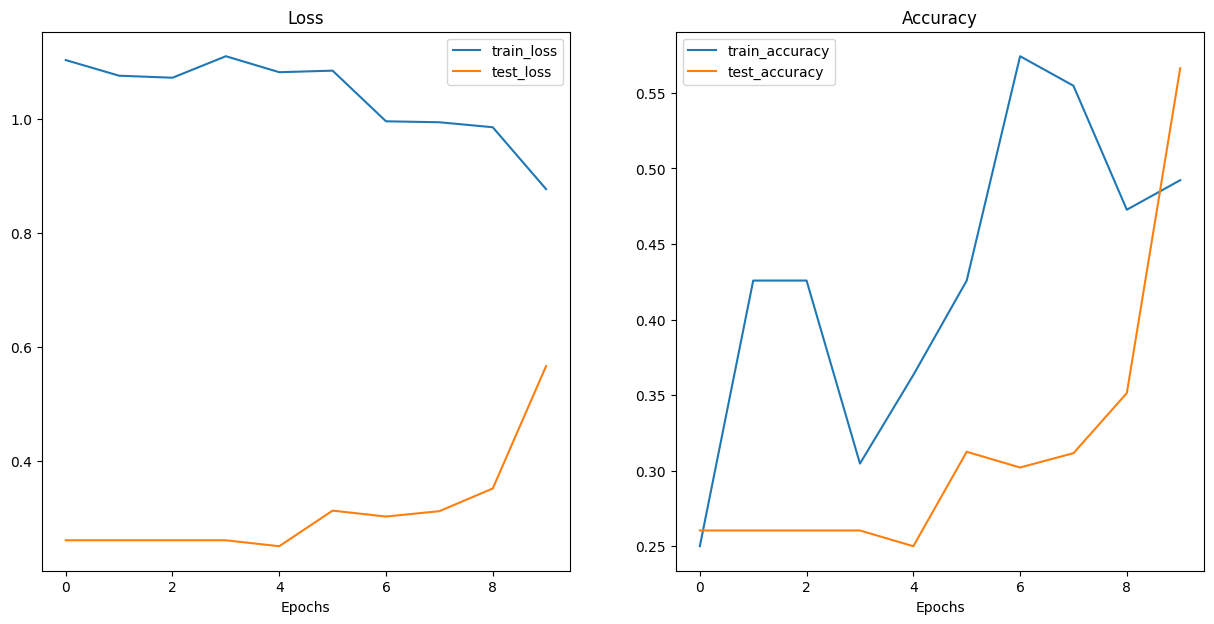

In [94]:
plot_loss_curves(model_0_results)

In [95]:
from torchvision import transforms
train_transforms_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [96]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(
    root=train_dir,
    transform=train_transforms_trivial
)

test_data_simple = datasets.ImageFolder(
    root=test_dir,
    transform=test_transform_simple
)

In [97]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(
    dataset=train_data_augmented,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

162/32

5.0625

In [98]:
img, label = next(iter(train_dataloader_simple))
img, label

(tensor([[[[0.4235, 0.4157, 0.4039,  ..., 0.0392, 0.0471, 0.0392],
           [0.6431, 0.6392, 0.6431,  ..., 0.0392, 0.0431, 0.0392],
           [0.7843, 0.7843, 0.7922,  ..., 0.0510, 0.0471, 0.0392],
           ...,
           [0.7647, 0.7765, 0.7961,  ..., 0.2706, 0.2471, 0.3490],
           [0.7569, 0.7686, 0.7922,  ..., 0.2667, 0.2353, 0.2549],
           [0.7137, 0.7451, 0.7725,  ..., 0.3020, 0.2824, 0.2392]],
 
          [[0.5137, 0.5137, 0.5255,  ..., 0.0392, 0.0510, 0.0510],
           [0.7137, 0.7176, 0.7137,  ..., 0.0510, 0.0588, 0.0510],
           [0.8196, 0.8196, 0.8196,  ..., 0.0627, 0.0627, 0.0549],
           ...,
           [0.8000, 0.8235, 0.8392,  ..., 0.0471, 0.0392, 0.0471],
           [0.7725, 0.8078, 0.8275,  ..., 0.0431, 0.0392, 0.0353],
           [0.7255, 0.7647, 0.8039,  ..., 0.0627, 0.0549, 0.0353]],
 
          [[0.5529, 0.5922, 0.5843,  ..., 0.0353, 0.0431, 0.0314],
           [0.7255, 0.7333, 0.7373,  ..., 0.0471, 0.0392, 0.0314],
           [0.8078, 0.81

Making a prediction on a custom image

In [99]:
%%writefile going_modular/predict.py

import requests
import torchvision
from going_modular import model_builder, utils, data_setup, engine, train
custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
    print("Downloading custom image...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")



custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))/255

custom_resize = transforms.Compose([
    transforms.Resize(size=(64, 64))
]
)

custom_transformed = custom_resize(custom_image_uint8)


c =custom_transformed.unsqueeze(dim=0)

torch.manual_seed(42)
model = model_builder.TinyVGG(input_shape=3,
                              hidden_units=10,
                              output_shape=3).to(device)
def predict():
  model.eval()
  with torch.inference_mode():

    pred = model_0(img[i].unsqueeze(0).to(device))
    preds = torch.argmax(torch.softmax(pred, dim=1), dim=1)
    pred_prob = torch.softmax(pred, dim=1)
    plt.imshow(custom_image_uint8.permute(1,2,0))
    plt.title(f"{class_names[preds]}, {pred_prob.max():.3f}")
    plt.axis(False)
    plt.show();

Writing going_modular/predict.py


In [105]:
import torchvision
custom_image_path = data_path / "04-pizza-dad.jpeg"
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
    print("Downloading custom image...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))/255
custom_image_uint8

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

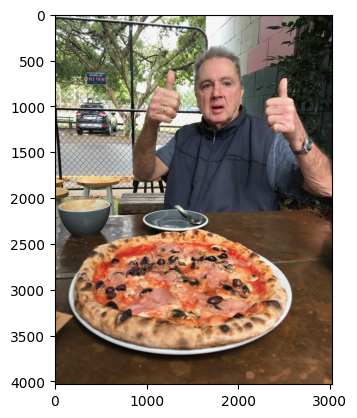

In [106]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

In [107]:
print(f"{custom_image_uint8.shape} \n {custom_image_uint8.dtype}")

torch.Size([3, 4032, 3024]) 
 torch.float32


In [108]:
device

'cuda'

In [109]:
os.cpu_count()

2

In [110]:
custom_resize = transforms.Compose([
    transforms.Resize(size=(64, 64))
]
)

custom_transformed = custom_resize(custom_image_uint8)
custom_transformed.shape

torch.Size([3, 64, 64])

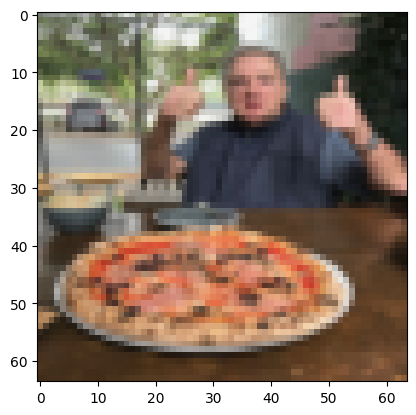

In [111]:
plt.imshow(custom_transformed.permute(1, 2, 0))

In [112]:
c =custom_transformed.unsqueeze(dim=0)
c.shape

torch.Size([1, 3, 64, 64])

In [113]:
model_0.eval()
with torch.inference_mode():
  preds = model_0(c.to(device))
preds

tensor([[-0.0255, -0.2242, -0.6851]], device='cuda:0')

In [114]:
custom_transformed.shape

torch.Size([3, 64, 64])

In [115]:
img[:0].shape

torch.Size([0, 3, 64, 64])

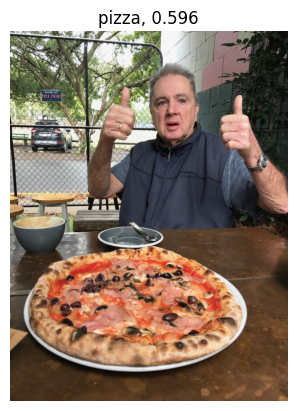

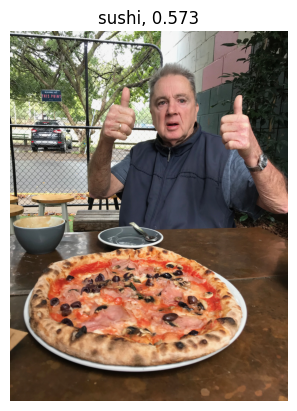

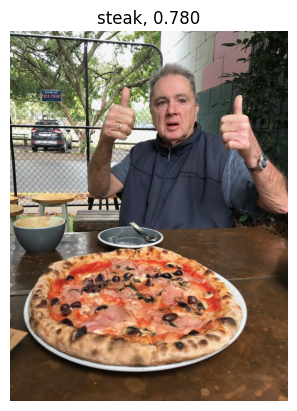

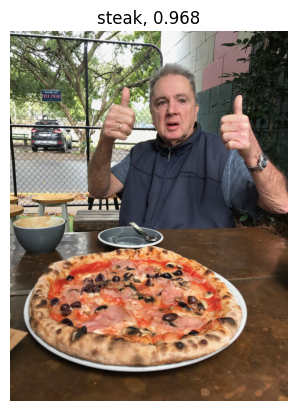

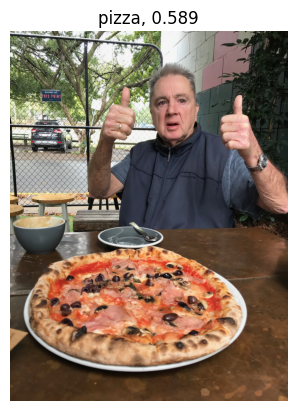

In [116]:
model_0.eval()
with torch.inference_mode():
  for i in range(len(img[:5])):
    pred = model_0(img[i].unsqueeze(0).to(device))
    preds = torch.argmax(torch.softmax(pred, dim=1), dim=1)
    pred_prob = torch.softmax(pred, dim=1)
    plt.imshow(custom_image_uint8.permute(1,2,0))
    plt.title(f"{class_names[preds]}, {pred_prob.max():.3f}")
    plt.axis(False)
    plt.show();

In [117]:
class_names

['pizza', 'steak', 'sushi']

In [118]:
preds = torch.argmax(torch.softmax(pred, dim=1), dim=1)

In [119]:
pred_prob = torch.softmax(pred, dim=1)
pred_prob.max()

tensor(0.5887, device='cuda:0')

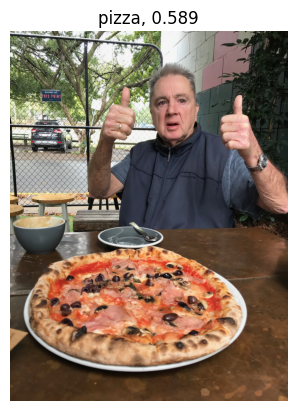

In [120]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.title(f"{class_names[preds]}, {pred_prob.max():.3f}")
plt.axis(False)
plt.show();

In [121]:
img.shape

torch.Size([32, 3, 64, 64])

# New section